### #1 p71 2,3,5 🫡

In [2]:
import torch


# 2
x = torch.arange(4.0)

print(f"x: {x}\n")

x.requires_grad_(True)
print(f"x.grad : {x.grad}\n")

y = 2 * torch.dot(x,x)
print(f"y: {y}\n")

y.backward(retain_graph=True)
print(f"x.grad #1 : {x.grad}\n") 
x.grad.zero_()
  

y.backward()
print(f"x.grad #2 : {x.grad}\n")




x: tensor([0., 1., 2., 3.])

x.grad : None

y: 28.0

x.grad #1 : tensor([ 0.,  4.,  8., 12.])

x.grad #2 : tensor([ 0.,  4.,  8., 12.])



- ```retain_graph=True```：确保第一次反向传播后计算图仍然保留。
- ```x.grad.zero_()```：在第二次反向传播前清零梯度，避免梯度累积。

In [4]:
#3 
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(3,4), requires_grad=True)
d = f(a)
d.sum().backward() #d.backward()


print(f"a.grad: {a.grad} a.grad = d/a ? {a.grad == d/a}\n")


a.grad: tensor([[256., 256., 256., 256.],
        [256., 256., 256., 256.],
        [256., 256., 256., 256.]]) a.grad = d/a ? tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])



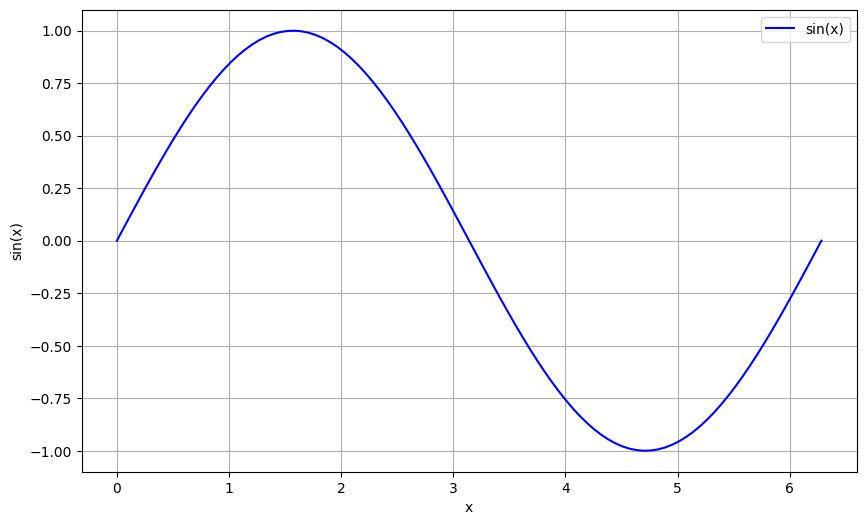

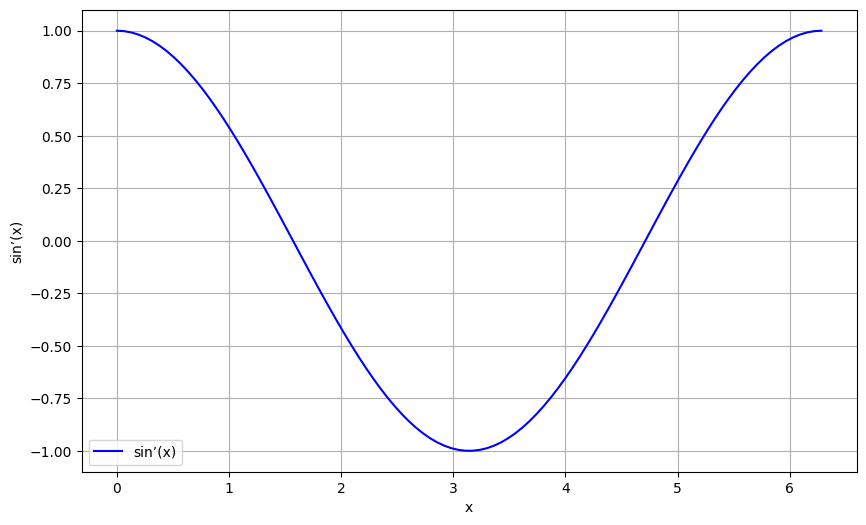

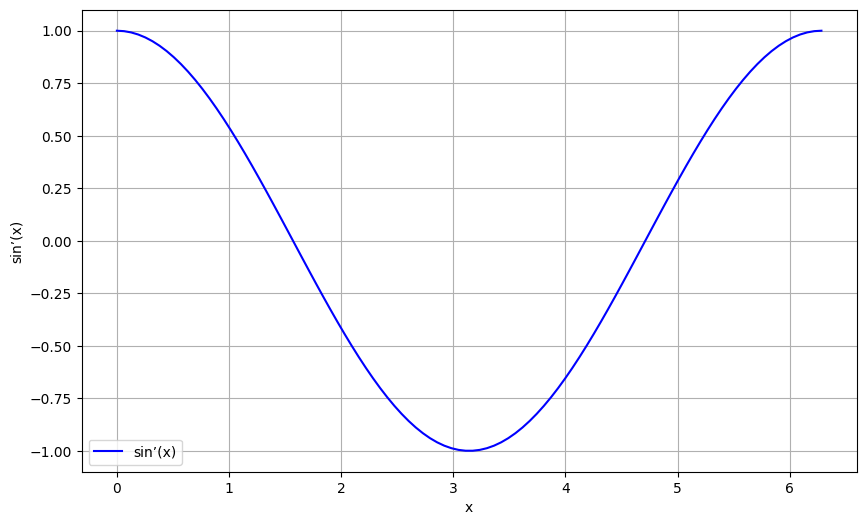

In [6]:
#5 
import numpy as np
import matplotlib.pyplot as plt

# 生成 x 值，范围从 0 到 2π，共 100 个点
x = np.linspace(0, 2 * np.pi, 100)


y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin(x)')

plt.grid(True)
plt.legend()
plt.show()


x_tensor = torch.tensor(x, dtype=torch.float32)
x_tensor.requires_grad_(True)
y_tensor = torch.sin(x_tensor)

y_tensor.sum().backward() #自动微分

x_grad_np = x_tensor.grad.numpy()


# print(f"x_tensor.grad: {x_tensor.grad}\n")

plt.figure(figsize=(10, 6))
plt.plot(x, x_grad_np, label='sin’(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin’(x)')

plt.grid(True)
plt.legend()
plt.show()


#数值微分
h = 1e-4
dy_dx_backward_np = (np.sin(x + h) - np.sin(x)) / h

plt.figure(figsize=(10, 6))
plt.plot(x, dy_dx_backward_np, label='sin’(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin’(x)')

plt.grid(True)
plt.legend()
plt.show()




### #2 处理房价预测数据集 🏘️

![image.png](image.png)

In [10]:
import pandas as pd


data = pd.read_csv('train.csv')
print(data)


#1
data.drop(['Id'], axis=1, inplace=True)

#2
inputs = data.iloc[:,19:20]
inputs  = inputs.fillna(inputs.mean())

#3
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

### #3 计算边界概率 
![image.png](image1.png)

In [11]:
print("边界概率 (男) : ",0.5)
print("边界概率 (女) : ",0.5)
print("边界概率 (计算机) : ",0.5)   
print("边界概率 (教育) : ",0.5)
print("边界概率 (总): ",1)

print("条件概率p(男 | 计算机) =  ",0.4 / 0.5)

边界概率 (男) :  0.5
边界概率 (女) :  0.5
边界概率 (计算机) :  0.5
边界概率 (教育) :  0.5
边界概率 (总):  1
条件概率p(男 | 计算机) =   0.8
